First few rows of the dataset:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
None

Summary statistics of the dataset:
       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000

Number of missing values in each column:
PassengerId    0
Survived       0
dtype: int64

Number of missing values after cleaning:
PassengerId    0
Survived       0
dtype: int64


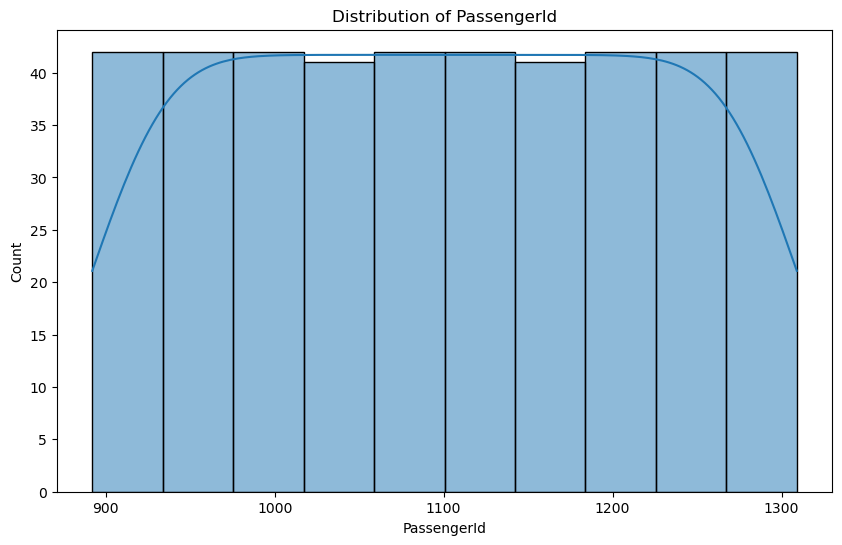

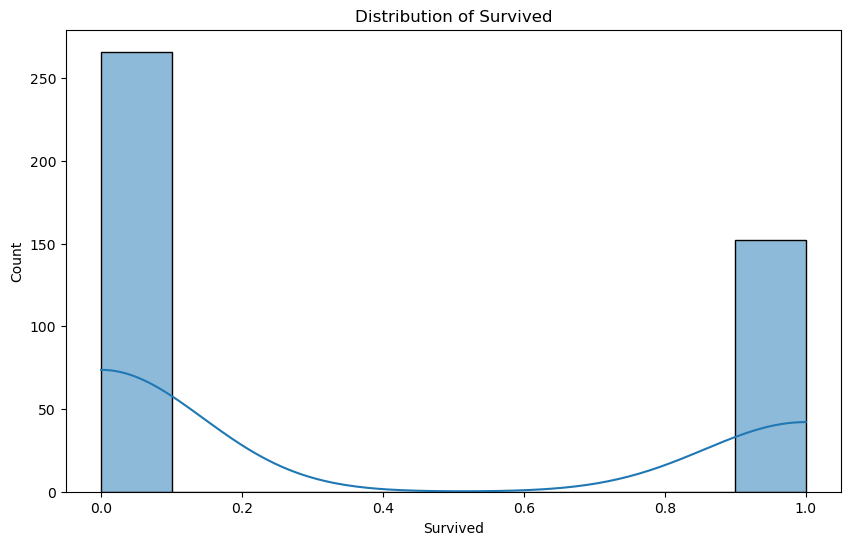

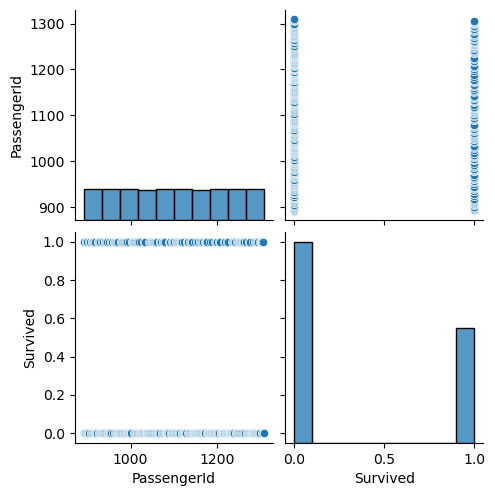

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the dataset
# Assuming the file is named 'gender_submission.csv'
file_path = 'gender_submission.csv'
df = pd.read_csv(file_path)

# Step 3: Inspect the dataset
print("First few rows of the dataset:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nSummary statistics of the dataset:")
print(df.describe())

# Step 4: Handle missing values
print("\nNumber of missing values in each column:")
print(df.isnull().sum())

# Dropping rows with missing values (for simplicity)
# You can also choose to fill missing values with some strategy
df_cleaned = df.dropna()

# Verify missing values are handled
print("\nNumber of missing values after cleaning:")
print(df_cleaned.isnull().sum())

# Step 5: Convert categorical variables (if any)
# Check for categorical variables and convert them
if 'Sex' in df_cleaned.columns:
    df_cleaned['Sex'] = df_cleaned['Sex'].map({'male': 0, 'female': 1})

# Step 6: Explore relationships and perform EDA
# Plotting distributions of numerical features
numerical_features = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_cleaned[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Exploring relationships between variables
# Example: Survival rate by sex
if 'Sex' in df_cleaned.columns and 'Survived' in df_cleaned.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Sex', y='Survived', data=df_cleaned)
    plt.title('Survival rate by sex')
    plt.show()

# Example: Survival rate by Pclass
if 'Pclass' in df_cleaned.columns and 'Survived' in df_cleaned.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Pclass', y='Survived', data=df_cleaned)
    plt.title('Survival rate by passenger class')
    plt.show()

# Pairplot to explore relationships between all numerical variables
sns.pairplot(df_cleaned)
plt.show()
